# Guia regresión - Resuelto
## Consigna
Para el dataset a continuación, calcular la regresión polinómica e ir variando el orden hasta obtener el resultado óptimo de AIC y BIC. También calcular $ R^2 $ y los p values.

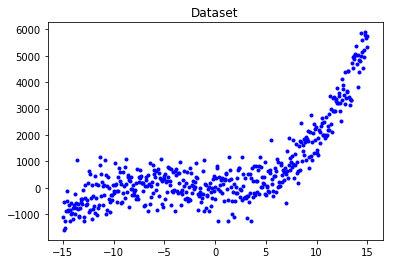

In [158]:
from operator import itemgetter
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

x = np.load('X.npy')
y = np.load('y.npy')
plt.figure()
plt.plot(x, y,'.',  color='blue')
plt.title('Dataset')
plt.show()

# this allows plots to appear directly in the notebook
%matplotlib inline

# Funciones

In [159]:
'''Función encargada de hacer los calculos de la regresion polinomica'''
#Recibe: Orden_N, el set de entrenamiento de las X, el set de entrenamiento de las Y.
def Regresion_Polinomica_N (N,Training_Set_X,Training_Set_Y):
    
    #Creacion de los Features con Grado "N" para utilizar en el modelo de Regresion Polinomica
    pol_features = PolynomialFeatures(degree = N, include_bias=False)
    X_pol = pol_features.fit_transform(Training_Set_X)
    
    #Creacion de la regresion polinomial.
    linear_reg = LinearRegression()
    linear_reg.fit(X_pol,Training_Set_Y)
    
    #Prediccion de Y - usando el "Test Set"
    y_train_pred = linear_reg.predict(X_pol)
    
    #Calculo de AIC y BIC del modelo de sklearn
    resid = Training_Set_Y - y_train_pred
    sse = sum(resid ** 2)
    n_samples = Training_Set_X.shape[0]
    AIC = n_samples * np.log(sse / n_samples) + 2 * N
    BIC = n_samples * np.log(sse / n_samples) + N * np.log(n_samples)
    R2 = r2_score(Training_Set_Y, y_train_pred)        
    
    return y_train_pred,linear_reg.intercept_,linear_reg.coef_,AIC,BIC,R2

# Solución

In [160]:
count_x = np.count_nonzero(x)
count_y = np.count_nonzero(y)
print("Cantidad de elementos en x: ",count_x)
print("Cantidad de elementos en y: ",count_y)
print("\nPrimeros 10 elementos de x e y:")
print("x:",x[0:10])
print("\ny:",y[0:10])

Cantidad de elementos en x:  500
Cantidad de elementos en y:  500

Primeros 10 elementos de x e y:
x: [-15.         -14.93987976 -14.87975952 -14.81963928 -14.75951904
 -14.6993988  -14.63927856 -14.57915832 -14.51903808 -14.45891784]

y: [-1106.05898936 -1601.67828299  -538.87681151 -1250.44850105
 -1525.05919039  -886.87092948  -113.08388129  -498.66479628
  -886.32891294  -841.73274315]


# Aplico la solución por regresión lineal utilizando sklearn

## Donde:
    - N: Grado del polinomio.
    - Porc_Train: Porcentaje de datos utilizados para el entrenamiento.
    - Porc_Test: Porcentaje de datos utilizados para el testeo ( 1 - Porc_Train).
    - x: Datos de X.
    - y: Datos de Y.

In [161]:
#Definición de variables del modelo:
Porc_Train = 0.8
Porc_Test = 1 - Porc_Train
#Sklearn - Regresión lineal
lm3 = LinearRegression()
#Calculo el index maximo
Index_Train_Set = int(round(count_x * Porc_Train))
Index_Test_Set = count_x - Index_Train_Set

#Separo los sets en Train_Set y Test_Set.
#Reshape es para obtener un 2D array, que es un argumento necesario para el armado de los "Features".
Training_Set_X = x[:Index_Train_Set].reshape(-1,1)
Training_Set_Y = y[:Index_Train_Set]

Test_Set_X = x[:Index_Test_Set].reshape(-1,1)
Test_Set_Y = y[:Index_Test_Set]

Modelo de orden - 1


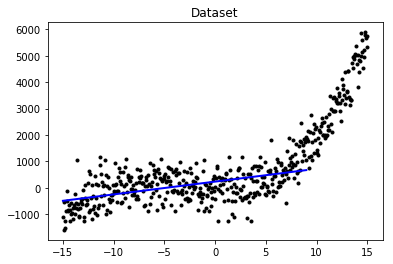

La ordenada al origen de nuestro modelo polinómico es: 229.64340800982268

Los coeficientes del modelo polinómico de orden 1 son:
[48.52527836]

AIC :5078.458605481926
BIC :5082.450070029034
R2  :0.2588838190520816

----------------------------------------------------------

Modelo de orden - 2


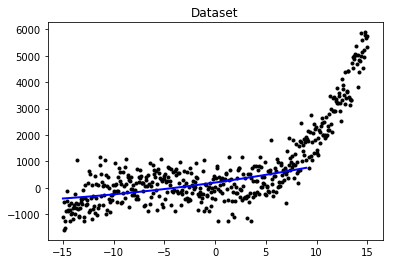

La ordenada al origen de nuestro modelo polinómico es: 193.9400586813365

Los coeficientes del modelo polinómico de orden 2 son:
[54.00715786  0.91181929]

AIC :5078.552030127046
BIC :5086.534959221262
R2  :0.2624078983409839

----------------------------------------------------------

Modelo de orden - 3


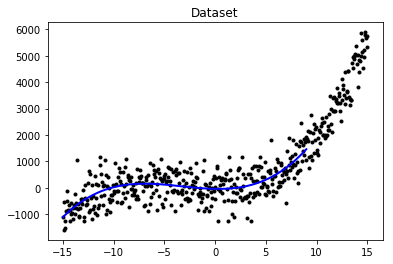

La ordenada al origen de nuestro modelo polinómico es: -46.385684547127696

Los coeficientes del modelo polinómico de orden 3 son:
[-7.34826061 10.18969907  1.02881378]

AIC :4978.01721931647
BIC :4989.991612957794
R2  :0.429191408600224

----------------------------------------------------------

Modelo de orden - 4


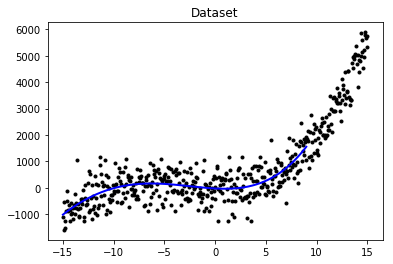

La ordenada al origen de nuestro modelo polinómico es: -31.317433527214902

Los coeficientes del modelo polinómico de orden 4 son:
[-2.00749884e+01  8.79567968e+00  1.26928510e+00  1.99991978e-02]

AIC :4978.3924438230615
BIC :4994.358302011494
R2  :0.43150529551215433

----------------------------------------------------------

Modelo de orden - 5


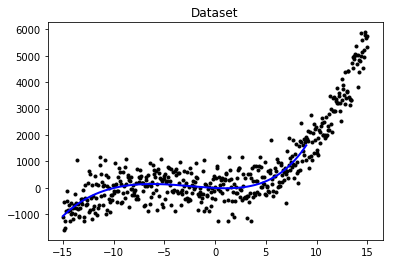

La ordenada al origen de nuestro modelo polinómico es: -11.836434223369636

Los coeficientes del modelo polinómico de orden 5 son:
[-1.82240009e+01  6.68070272e+00  1.14300692e+00  4.70073895e-02
  1.79694502e-03]

AIC :4979.912357779817
BIC :4999.869680515357
R2  :0.4321872021461801

----------------------------------------------------------

Modelo de orden - 6


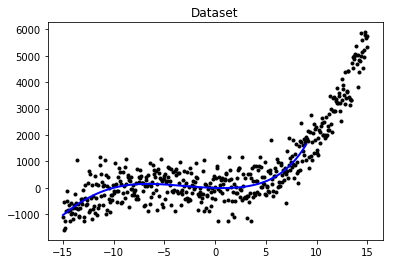

La ordenada al origen de nuestro modelo polinómico es: -10.87746839165986

Los coeficientes del modelo polinómico de orden 6 son:
[-1.12149662e+01  6.68758557e+00  7.98440677e-01  3.53913474e-02
  5.19820555e-03  1.88581001e-04]

AIC :4981.719791295347
BIC :5005.668578577995
R2  :0.4324604906439454

----------------------------------------------------------

Modelo de orden - 7


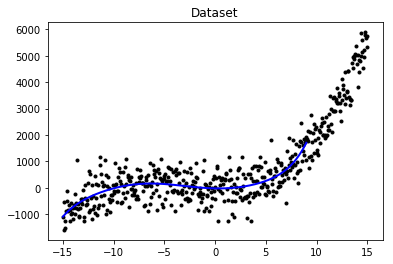

La ordenada al origen de nuestro modelo polinómico es: -27.785593626883767

Los coeficientes del modelo polinómico de orden 7 son:
[-7.67798851e+00  1.02593107e+01  6.69193104e-01 -7.87185016e-02
  3.24664203e-03  1.12679167e-03  4.45873451e-05]

AIC :4983.3285408591155
BIC :5011.268792688871
R2  :0.4330153444427559

----------------------------------------------------------

Modelo de orden - 8


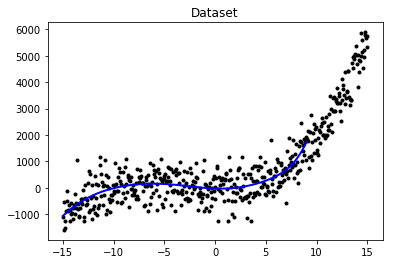

La ordenada al origen de nuestro modelo polinómico es: -32.413014068678805

Los coeficientes del modelo polinómico de orden 8 son:
[-1.28853638e+01  1.13730218e+01  1.15042097e+00 -1.07905193e-01
 -8.44188280e-03  1.06797856e-03  1.28597653e-04  3.49342864e-06]

AIC :4985.2413717625
BIC :5017.173088139364
R2  :0.4331388898311398

----------------------------------------------------------

Modelo de orden - 9


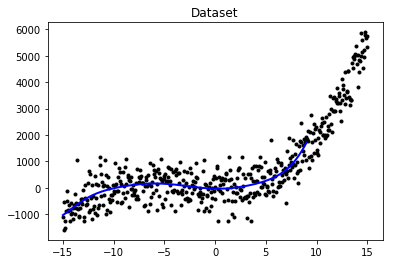

La ordenada al origen de nuestro modelo polinómico es: -38.231383299471005

Los coeficientes del modelo polinómico de orden 9 son:
[-7.71604461e+00  1.34197848e+01  6.51495943e-01 -2.30230346e-01
  1.57487601e-03  3.54447678e-03  1.17177640e-04 -1.26133736e-05
 -5.95355138e-07]

AIC :4987.149607806687
BIC :5023.072788730658
R2  :0.4332689184603091

----------------------------------------------------------



In [162]:
#Orden máximo
Max_N = 10

#Lista con tuplas de (N,AIC,BIC,R2)
compare_list = []

#Muestro los Max_N modelos necesarios

for N in range(1,Max_N):
    #Aplico la funcion que devuelve los valores a mostrar.
    y_train_pred,lr_intercept,lr_coef,AIC,BIC,R2 = Regresion_Polinomica_N(N,Training_Set_X,Training_Set_Y)
    
    compare_list.append((N,AIC,BIC,R2))
    
    print("Modelo de orden - {}".format(N))
    
    #Plot con los puntos - Reutilizo esta parte para que me dibuje los puntos.
    plt.figure()
    plt.plot(X, y,'.',  color='black')
    plt.title('Dataset')
    plt.plot(Training_Set_X,y_train_pred, color='blue', linewidth = 2)
    plt.show()

    print("La ordenada al origen de nuestro modelo polinómico es: {}".format(lr_intercept))
    print("\nLos coeficientes del modelo polinómico de orden {} son:".format(N))
    print(lr_coef)
    print("\nAIC :{}".format(AIC))
    print("BIC :{}".format(BIC))
    print("R2  :{}".format(R2))
    print("\n----------------------------------------------------------\n")

In [166]:
#Buscando el mejor de todos los AICs y BICs

min_AIC = min(compare_list,key=itemgetter(1))[0]

min_BIC = min(compare_list,key=itemgetter(2))[0]

print("Menor AIC - Orden del polinomio:{}".format(min_AIC))
print("Menor BIC - Orden del polinomio:{}".format(min_BIC))

Menor AIC - Orden del polinomio:3
Menor BIC - Orden del polinomio:3
